In [98]:
%load_ext autoreload
%autoreload 2

import numpy as np
import networkx as nx
from experiments import experiments, bk, colors
from graph import Graph
import os
import torch

from scipy.stats import wasserstein_distance
from torch_geometric.utils.convert import from_networkx

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
for exp in experiments:
    print(exp['source'])
            
    gt = Graph(data_dir=f"data_utils/{exp['source']}", predicate=exp['predicate'])
    pyg_graph, mapping, gt = gt.create_graph()

    pyg_graph.x = torch.tensor([gt.nodes[n]["feature"] for n in gt.nodes()], dtype=torch.float)
    pyg_graph.edge_attr = torch.tensor([gt[u][v]["feature"] for u, v in gt.edges()], dtype=torch.float)

    # Map string node names to integer indices
    #node_mapping = {name: idx for idx, name in enumerate(gt.network.nodes)}
    #G = nx.relabel_nodes(gt.network, node_mapping)

    #pyg_graph = from_networkx(gt)
    #os.makedirs(f"""dataset/{exp['source']}""")
    os.makedirs(f"""dataset/{exp['source']}""")
    torch.save(pyg_graph, f"""dataset/{exp['source']}/data.pt""")
    

yeast
Graph successfully created.
  It contains 2470 vertices and 14574 edges.
  It contains 1 connected components.


FileExistsError: [WinError 183] Não é possível criar um arquivo já existente: 'dataset/yeast/processed'

In [109]:
print("Edge attributes:", pyg_graph.edge_attr if hasattr(pyg_graph, "edge_attr") else "None found")
pyg_graph.x

Edge attributes: tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [102]:
gt.edges.data()

EdgeDataView([(0, 1, {'feature': array([0, 0, 1, 0, 0, 0, 0])}), (0, 2, {'feature': array([0, 0, 1, 0, 0, 0, 0])}), (0, 69, {'feature': array([0, 0, 0, 1, 0, 0, 0])}), (0, 75, {'feature': array([0, 0, 0, 1, 0, 0, 0])}), (0, 96, {'feature': array([0, 0, 0, 1, 0, 0, 0])}), (0, 129, {'feature': array([0, 0, 0, 1, 0, 0, 0])}), (0, 136, {'feature': array([0, 0, 0, 1, 0, 0, 0])}), (0, 146, {'feature': array([0, 0, 0, 1, 0, 0, 0])}), (0, 163, {'feature': array([0, 0, 0, 1, 0, 0, 0])}), (0, 173, {'feature': array([0, 0, 0, 1, 0, 0, 0])}), (0, 186, {'feature': array([0, 0, 0, 1, 0, 0, 0])}), (0, 212, {'feature': array([0, 0, 0, 1, 0, 0, 0])}), (0, 232, {'feature': array([0, 0, 0, 1, 0, 0, 0])}), (0, 253, {'feature': array([0, 0, 0, 1, 0, 0, 0])}), (0, 278, {'feature': array([0, 0, 0, 1, 0, 0, 0])}), (0, 285, {'feature': array([0, 0, 0, 1, 0, 0, 0])}), (0, 306, {'feature': array([0, 0, 0, 1, 0, 0, 0])}), (0, 317, {'feature': array([0, 0, 0, 1, 0, 0, 0])}), (0, 320, {'feature': array([0, 0, 0, 1,

In [101]:
pyg_graph.x

In [ ]:
gt.to_directed()

AttributeError: 'GlobalStorage' object has no attribute 'to_directed'

- Não dá pra usar EMD porque ela é simétrica e a transferência não é. Porque não necessariamente a transferência de A pra B ser um sucesso garante que B pra A também vai ser.
- Medidas de closeness e betweeness para grafos com mais de uma componente conexa

In [ ]:
similarities['closeness']

{'(yeast,twitter)': 0.1233748365550584,
 '(yeast,cora)': 0.0857614749657403,
 '(yeast,nell_sports)': 0.11560950073586555,
 '(yeast,nell_finances)': 0.21371246172127562,
 '(twitter,yeast)': 0.1233748365550584,
 '(twitter,nell_finances)': 0.337087298276334,
 '(twitter,nell_sports)': 0.23898433729092394,
 '(twitter,cora)': 0.20913631152079867,
 '(nell_sports,nell_finances)': 0.09810379767942465,
 '(nell_sports,yeast)': 0.11560950073586555,
 '(nell_sports,twitter)': 0.23898433729092394,
 '(nell_sports,cora)': 0.02984884181028334,
 '(nell_finances,nell_sports)': 0.09810379767942465,
 '(nell_finances,yeast)': 0.21371246172127562,
 '(nell_finances,twitter)': 0.337087298276334,
 '(nell_finances,cora)': 0.1279509867555353,
 '(cora,yeast)': 0.0857614749657403,
 '(cora,nell_sports)': 0.02984884181028334,
 '(cora,nell_finances)': 0.1279509867555353,
 '(cora,twitter)': 0.20913631152079867}

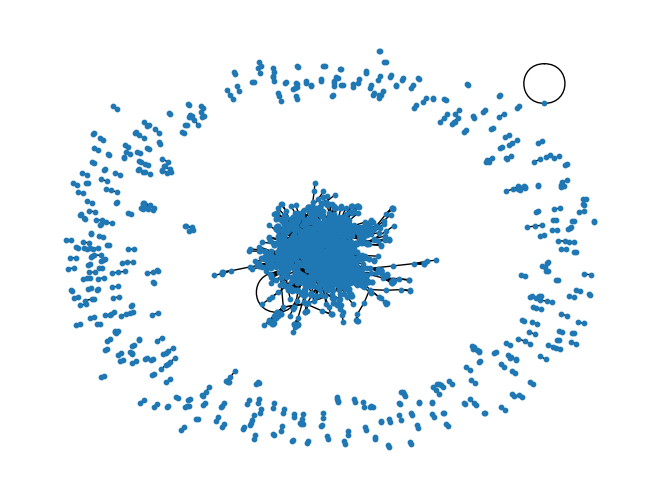

In [ ]:
nx.draw(gt.network, pos=nx.spring_layout(gt.network), node_size = 10)

In [ ]:
nodesAt5 = filter(lambda (n, d): d['at'] == 5, P.nodes(data=True))

SyntaxError: invalid syntax (2287772888.py, line 1)